In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse, Circle
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from statsmodels.stats.outliers_influence import variance_inflation_factor
from math import e
from bs4 import BeautifulSoup

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import FactorAnalysis

from sklearn.model_selection import cross_validate

from scipy import stats
import scipy.stats as st
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial import distance

In [2]:
#Отобранные данные
IconDataSet = pd.read_csv('IconDataSet.csv')
Countries = IconDataSet['Country']
NoCountrySet = IconDataSet.drop(columns = ['Country'])

In [3]:
IconDataSet

,Country,Crime Index,Cost of Living Index,Health Care Index,Cultural Diversity Index,Lang_index,Ladder score
0,Venezuela,81.2,39.4,38.7,0.039,0.059,5.6067
1,South Africa,75.4,33.8,64.0,0.729,0.876,5.4220
2,Peru,67.8,30.9,56.4,0.577,0.279,5.8409
3,Nigeria,66.2,19.3,48.7,0.831,0.883,4.8808
4,Brazil,65.6,35.2,58.9,0.012,0.068,6.2720
...,...,...,...,...,...,...,...
75,Slovenia,24.2,49.3,66.5,0.146,0.206,6.7433
76,Estonia,23.8,53.0,76.3,0.484,0.550,6.4477
77,Singapore,23.5,81.9,70.6,0.386,0.823,6.5228
78,Japan,22.6,50.7,79.3,0.012,0.063,6.0598


In [4]:
#Статистический анализ данных
#Оценки мат. ожидания
IconDataMeans = {}

for feature in list(NoCountrySet):
  IconDataMeans[feature] = np.mean(IconDataSet[feature])

IconDataMeans

{'Crime Index': 41.8975,
 'Cost of Living Index': 47.122499999999995,
 'Health Care Index': 63.71624999999999,
 'Cultural Diversity Index': 0.31518749999999995,
 'Lang_index': 0.41948749999999996,
 'Ladder score': 6.015031269192695}

In [5]:
#Доверительный интервал
#Функция
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

IconDataConfInt = {}
#Библиотечная реализация
for feature in list(NoCountrySet):
  print(mean_confidence_interval(IconDataSet[feature]))
  IconDataConfInt[feature] = st.t.interval(0.95, df=len(IconDataSet[feature])-1, loc=np.mean(IconDataSet[feature]), scale=st.sem(IconDataSet[feature]))

IconDataConfInt

(41.8975, 38.96883011707153, 44.82616988292847)
(47.122499999999995, 43.1549678450716, 51.09003215492839)
(63.71624999999999, 61.51208613043741, 65.92041386956257)
(0.31518749999999995, 0.26556112188986036, 0.36481387811013954)
(0.41948749999999996, 0.3614633277735369, 0.477511672226463)
(6.015031269192695, 5.791889013134494, 6.238173525250897)


{'Crime Index': (38.96883011707153, 44.82616988292847),
 'Cost of Living Index': (43.1549678450716, 51.09003215492839),
 'Health Care Index': (61.51208613043741, 65.92041386956257),
 'Cultural Diversity Index': (0.26556112188986036, 0.36481387811013954),
 'Lang_index': (0.3614633277735369, 0.477511672226463),
 'Ladder score': (5.791889013134494, 6.238173525250897)}

In [6]:
#Среднеквадратичное отклонение
IconDataStds = {}

for feature in list(NoCountrySet):
  IconDataStds[feature] = np.std(IconDataSet[feature])

IconDataStds

{'Crime Index': 13.077738479951341,
 'Cost of Living Index': 17.71669392832647,
 'Health Care Index': 9.842515478143785,
 'Cultural Diversity Index': 0.22160257747542106,
 'Lang_index': 0.2591022478554557,
 'Ladder score': 0.9964236958101625}

In [7]:
#Асимметрия
IconDataSkew = {}

for feature in list(NoCountrySet):
  IconDataSkew[feature] = st.skew(IconDataSet[feature])

IconDataSkew

{'Crime Index': 0.5195608072181912,
 'Cost of Living Index': 0.8319068683644373,
 'Health Care Index': -0.26808857176724227,
 'Cultural Diversity Index': 0.3729017339504706,
 'Lang_index': 0.3310411777565677,
 'Ladder score': -0.8123450631540026}

In [8]:
#Эксцесс
IconDataKurtosis = {}

for feature in list(NoCountrySet):
  IconDataKurtosis[feature] = st.kurtosis(IconDataSet[feature])

IconDataKurtosis

{'Crime Index': 0.11656276086124295,
 'Cost of Living Index': 0.7714237989484887,
 'Health Care Index': -0.6131082845838245,
 'Cultural Diversity Index': -1.0131301736818406,
 'Lang_index': -1.0261168713476019,
 'Ladder score': 0.4680556187519218}

In [9]:
#Основные квантили
IconDataQuantiles = {}

for feature in list(NoCountrySet):
  IconDataQuantiles[feature] = [np.quantile(IconDataSet[feature],0.1),np.quantile(IconDataSet[feature],0.25),np.quantile(IconDataSet[feature],0.5),np.quantile(IconDataSet[feature],0.9)]

IconDataQuantiles

{'Crime Index': [25.39, 32.2, 42.5, 59.670000000000016],
 'Cost of Living Index': [28.59, 33.425, 43.599999999999994, 68.22],
 'Health Care Index': [51.57, 56.85, 64.75, 76.66],
 'Cultural Diversity Index': [0.05670000000000001,
  0.11025,
  0.2825,
  0.6007000000000002],
 'Lang_index': [0.10099999999999999, 0.1885, 0.4, 0.8233],
 'Ladder score': [4.637990140914917,
  5.408774971961975,
  6.210999965667725,
  7.06637020111084]}

In [10]:
#Проверить на наличие пропусков, ошибок
np.where(IconDataSet.isna() == True)
#Определить формы распределения
for feature in list(NoCountrySet):
  print(str(feature))
  print(st.kstest(NoCountrySet[feature], 'norm'))


Crime Index
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=15.6, statistic_sign=-1)
Cost of Living Index
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=18.5, statistic_sign=-1)
Health Care Index
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=38.7, statistic_sign=-1)
Cultural Diversity Index
KstestResult(statistic=0.5007978840288801, pvalue=4.406194499307614e-19, statistic_location=0.002, statistic_sign=-1)
Lang_index
KstestResult(statistic=0.510770132983785, pvalue=6.932719303632857e-20, statistic_location=0.027, statistic_sign=-1)
Ladder score
KstestResult(statistic=0.9966001714272346, pvalue=6.570396106751502e-198, statistic_location=2.7065000534057617, statistic_sign=-1)


In [11]:
#Выявить наличие явных особенностей, выбросов, тенденций
#Для выявления явных особенностей, выбросов и тенденций построю диаграммы рассеевания
SortedSet = IconDataSet.sort_values('Country')
SortedSet.reset_index(inplace = True)

In [12]:
SortedSet

,index,Country,Crime Index,Cost of Living Index,Health Care Index,Cultural Diversity Index,Lang_index,Ladder score
0,32,Albania,45.6,40.8,49.5,0.209,0.480,5.3042
1,14,Algeria,52.2,29.5,54.7,0.318,0.408,5.3635
2,24,Australia,47.1,72.8,69.8,0.093,0.407,7.0569
3,64,Austria,29.3,66.8,76.6,0.099,0.294,6.9047
4,60,Azerbaijan,31.6,31.1,47.7,0.203,0.151,4.8934
...,...,...,...,...,...,...,...,...
75,79,United Arab Emirates,15.6,57.8,69.2,0.625,0.874,6.7331
76,21,United Kingdom,47.4,63.7,73.5,0.090,0.190,6.7490
77,17,United States,49.3,72.9,67.6,0.278,0.367,6.7248
78,0,Venezuela,81.2,39.4,38.7,0.039,0.059,5.6067


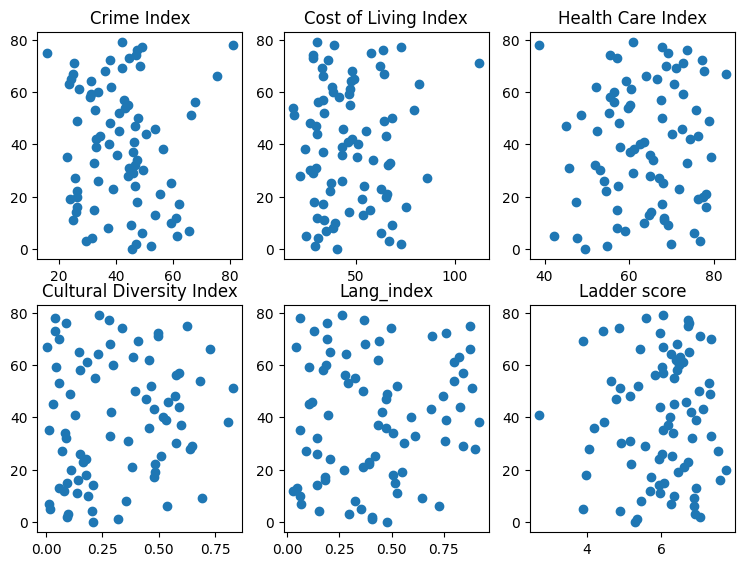

In [13]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (9,6.5))

ax[0,0].scatter(x = SortedSet['Crime Index'], y=range(80))
ax[0,0].set_title("Crime Index")
ax[0,1].scatter(x = SortedSet['Cost of Living Index'], y=range(80))
ax[0,1].set_title("Cost of Living Index")
ax[0,2].scatter(x = SortedSet['Health Care Index'], y=range(80))
ax[0,2].set_title("Health Care Index")
ax[1,0].scatter(x = SortedSet['Cultural Diversity Index'], y=range(80))
ax[1,0].set_title("Cultural Diversity Index")
ax[1,1].scatter(x = SortedSet['Lang_index'], y=range(80))
ax[1,1].set_title("Lang_index")
ax[1,2].scatter(x = SortedSet['Ladder score'], y=range(80))
ax[1,2].set_title("Ladder score")

plt.show()

In [14]:
#Построить графики и гистограммы
#Не указано какие графики требуется построить, поэтому построю гистограмы и наложу на них эмпирическую плотность распределения

<Axes: ylabel='Density'>

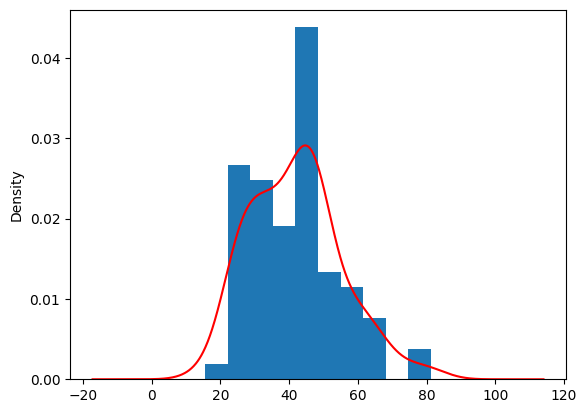

In [15]:
NoCountrySet['Crime Index'].hist(density = True)
NoCountrySet['Crime Index'].plot.density(color='red')

In [ ]:
NoCountrySet['Cost of Living Index'].hist(density = True)
NoCountrySet['Cost of Living Index'].plot.density(color='red')

In [ ]:
NoCountrySet['Health Care Index'].hist(density = True)
NoCountrySet['Health Care Index'].plot.density(color='red')

In [ ]:
NoCountrySet['Cultural Diversity Index'].hist(density = True)
NoCountrySet['Cultural Diversity Index'].plot.density(color='red')

In [ ]:
NoCountrySet['Lang_index'].hist(density = True)
NoCountrySet['Lang_index'].plot.density(color='red')

In [ ]:
NoCountrySet['Ladder score'].hist(density = True)
NoCountrySet['Ladder score'].plot.density(color='red')

Text(0.5, 1.0, 'Корреляция между факторами')

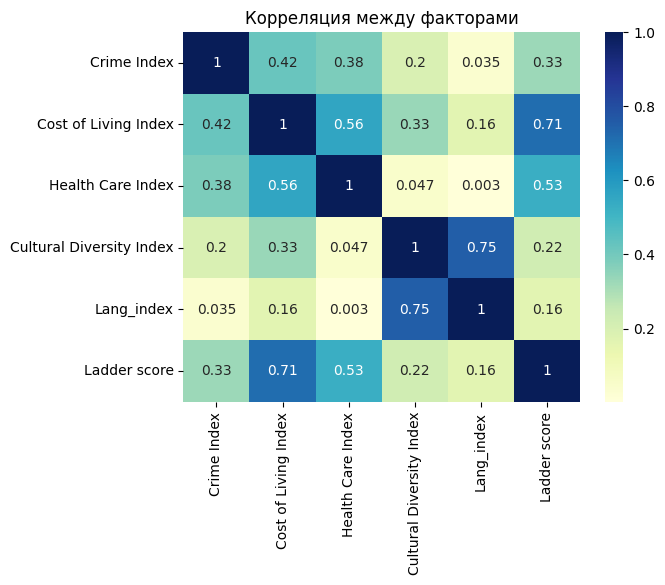

In [16]:
#Построить корреляционную матрицу
sns.heatmap(abs(NoCountrySet.corr()), annot = True, cmap='YlGnBu')
plt.yticks(rotation=0)
plt.title('Корреляция между факторами')

In [17]:
#Проверить значимость корреляции
#Функция pearsonr совпадает с функцией cor.test в R
CorrWeight = {}

for feature1 in list(NoCountrySet):
  for feature2 in list(NoCountrySet):
    CorrWeight[feature1 + ":" + feature2] = st.pearsonr(NoCountrySet[feature1], NoCountrySet[feature2])

CorrWeight

{'Crime Index:Crime Index': PearsonRResult(statistic=1.0, pvalue=0.0),
 'Crime Index:Cost of Living Index': PearsonRResult(statistic=-0.4229255877740634, pvalue=9.294901835294809e-05),
 'Crime Index:Health Care Index': PearsonRResult(statistic=-0.3812609275889683, pvalue=0.000484452031614366),
 'Crime Index:Cultural Diversity Index': PearsonRResult(statistic=0.19505733509671538, pvalue=0.0829385898394236),
 'Crime Index:Lang_index': PearsonRResult(statistic=-0.03503055388135413, pvalue=0.7577123562376483),
 'Crime Index:Ladder score': PearsonRResult(statistic=-0.3274657011319463, pvalue=0.0030262320747549056),
 'Cost of Living Index:Crime Index': PearsonRResult(statistic=-0.4229255877740634, pvalue=9.294901835294809e-05),
 'Cost of Living Index:Cost of Living Index': PearsonRResult(statistic=1.0, pvalue=0.0),
 'Cost of Living Index:Health Care Index': PearsonRResult(statistic=0.557516770016103, pvalue=7.794333320637263e-08),
 'Cost of Living Index:Cultural Diversity Index': PearsonRRes

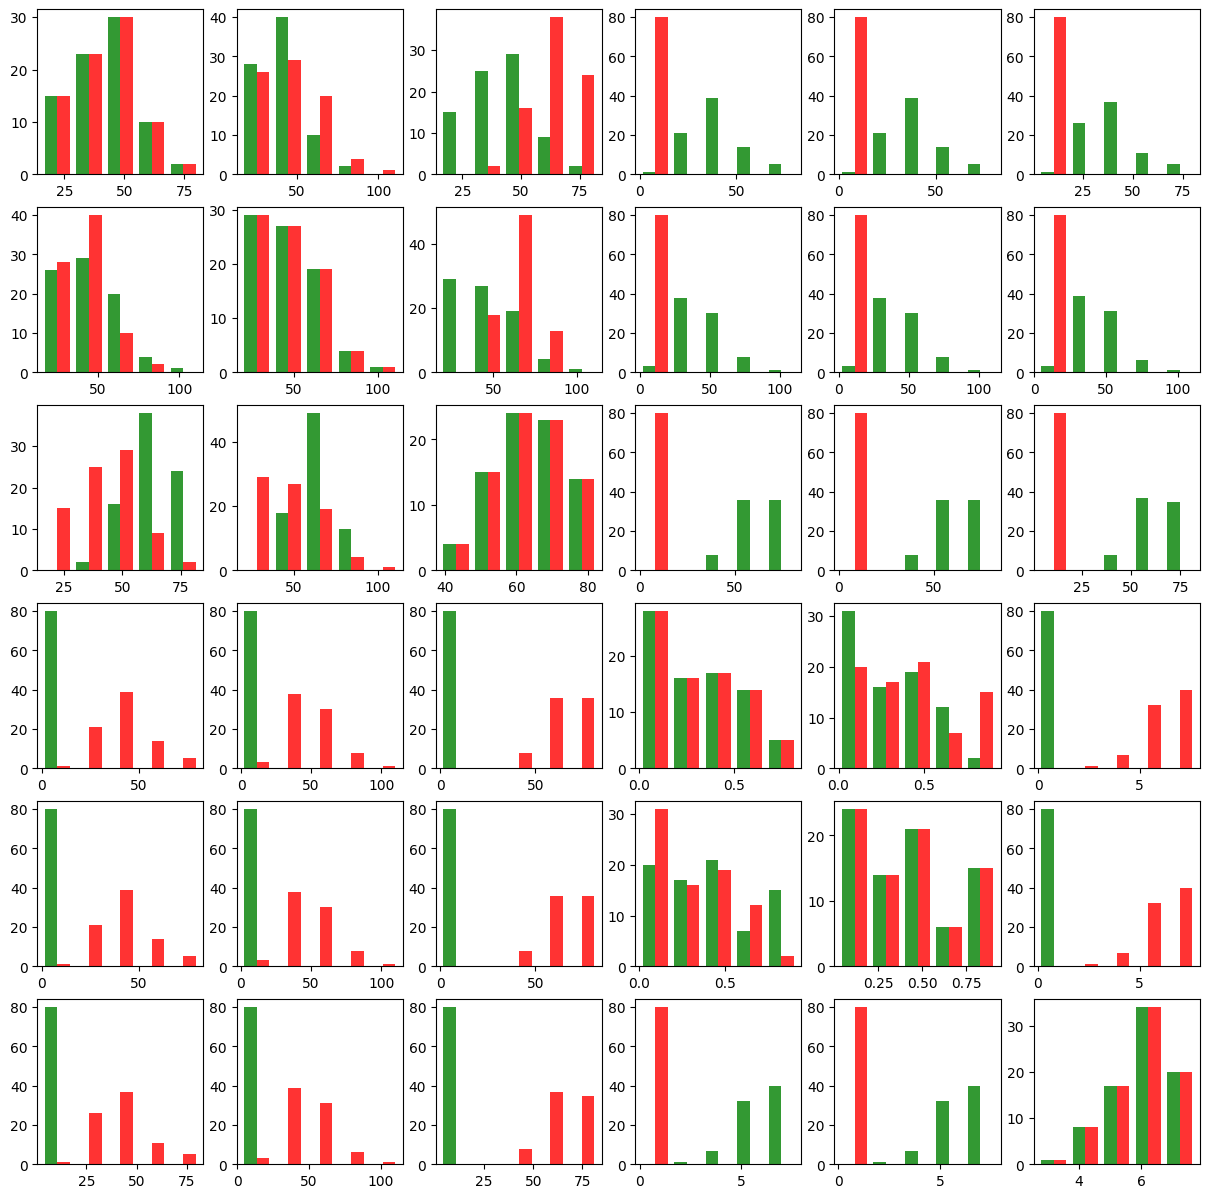

In [18]:
#Построить парные гистограммы

fig, ax = plt.subplots(nrows = 6, ncols = 6, figsize = (15,15))

k = 0
for feature1 in list(NoCountrySet):
  l = 0
  for feature2 in list(NoCountrySet):
    #print(str(k) + " " + str(l))
    ax[k,l].hist([NoCountrySet[feature1], NoCountrySet[feature2]], color=['g','r'], alpha=0.8, bins=5)
    l = l + 1
  k = k + 1


plt.show()

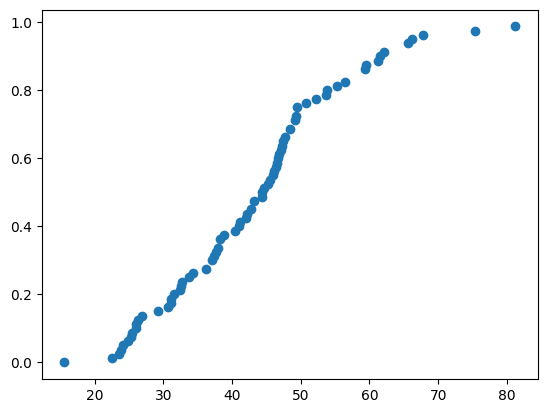

In [19]:
#Выявить наличие особенностей в совместном выборочном распределении вероятностей
#Для этого построю график эмпирической функции распределения, как в R plot(ecdf(df))
ecdf = st.ecdf(NoCountrySet['Crime Index'])
plt.scatter(np.flip(ecdf.sf.quantiles), ecdf.sf.probabilities)

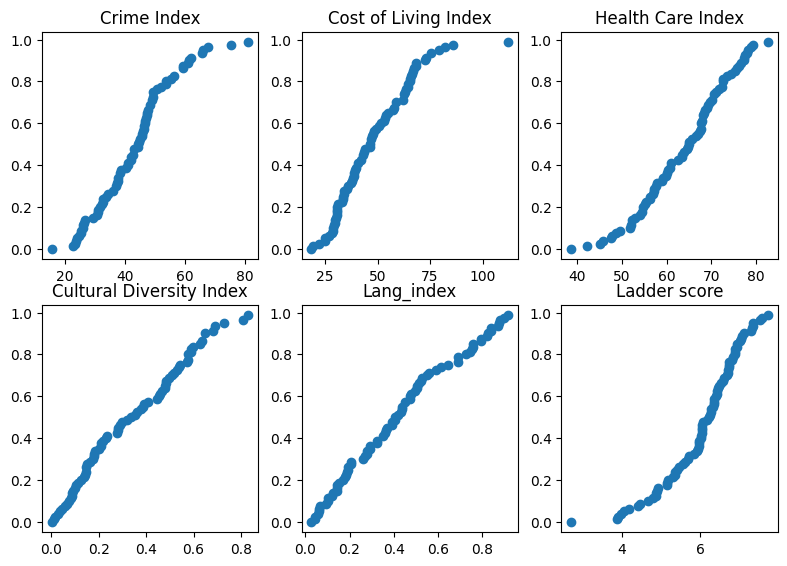

In [20]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (9.5,6.5))

ecdf = st.ecdf(NoCountrySet['Crime Index'])
ax[0,0].scatter(np.flip(ecdf.sf.quantiles), ecdf.sf.probabilities)
ax[0,0].set_title("Crime Index")

ecdf = st.ecdf(NoCountrySet['Cost of Living Index'])
ax[0,1].scatter(np.flip(ecdf.sf.quantiles), ecdf.sf.probabilities)
ax[0,1].set_title("Cost of Living Index")

ecdf = st.ecdf(NoCountrySet['Health Care Index'])
ax[0,2].scatter(np.flip(ecdf.sf.quantiles), ecdf.sf.probabilities)
ax[0,2].set_title("Health Care Index")

ecdf = st.ecdf(NoCountrySet['Cultural Diversity Index'])
ax[1,0].scatter(np.flip(ecdf.sf.quantiles), ecdf.sf.probabilities)
ax[1,0].set_title("Cultural Diversity Index")

ecdf = st.ecdf(NoCountrySet['Lang_index'])
ax[1,1].scatter(np.flip(ecdf.sf.quantiles), ecdf.sf.probabilities)
ax[1,1].set_title("Lang_index")

ecdf = st.ecdf(NoCountrySet['Ladder score'])
ax[1,2].scatter(np.flip(ecdf.sf.quantiles), ecdf.sf.probabilities)
ax[1,2].set_title("Ladder score")

plt.show()

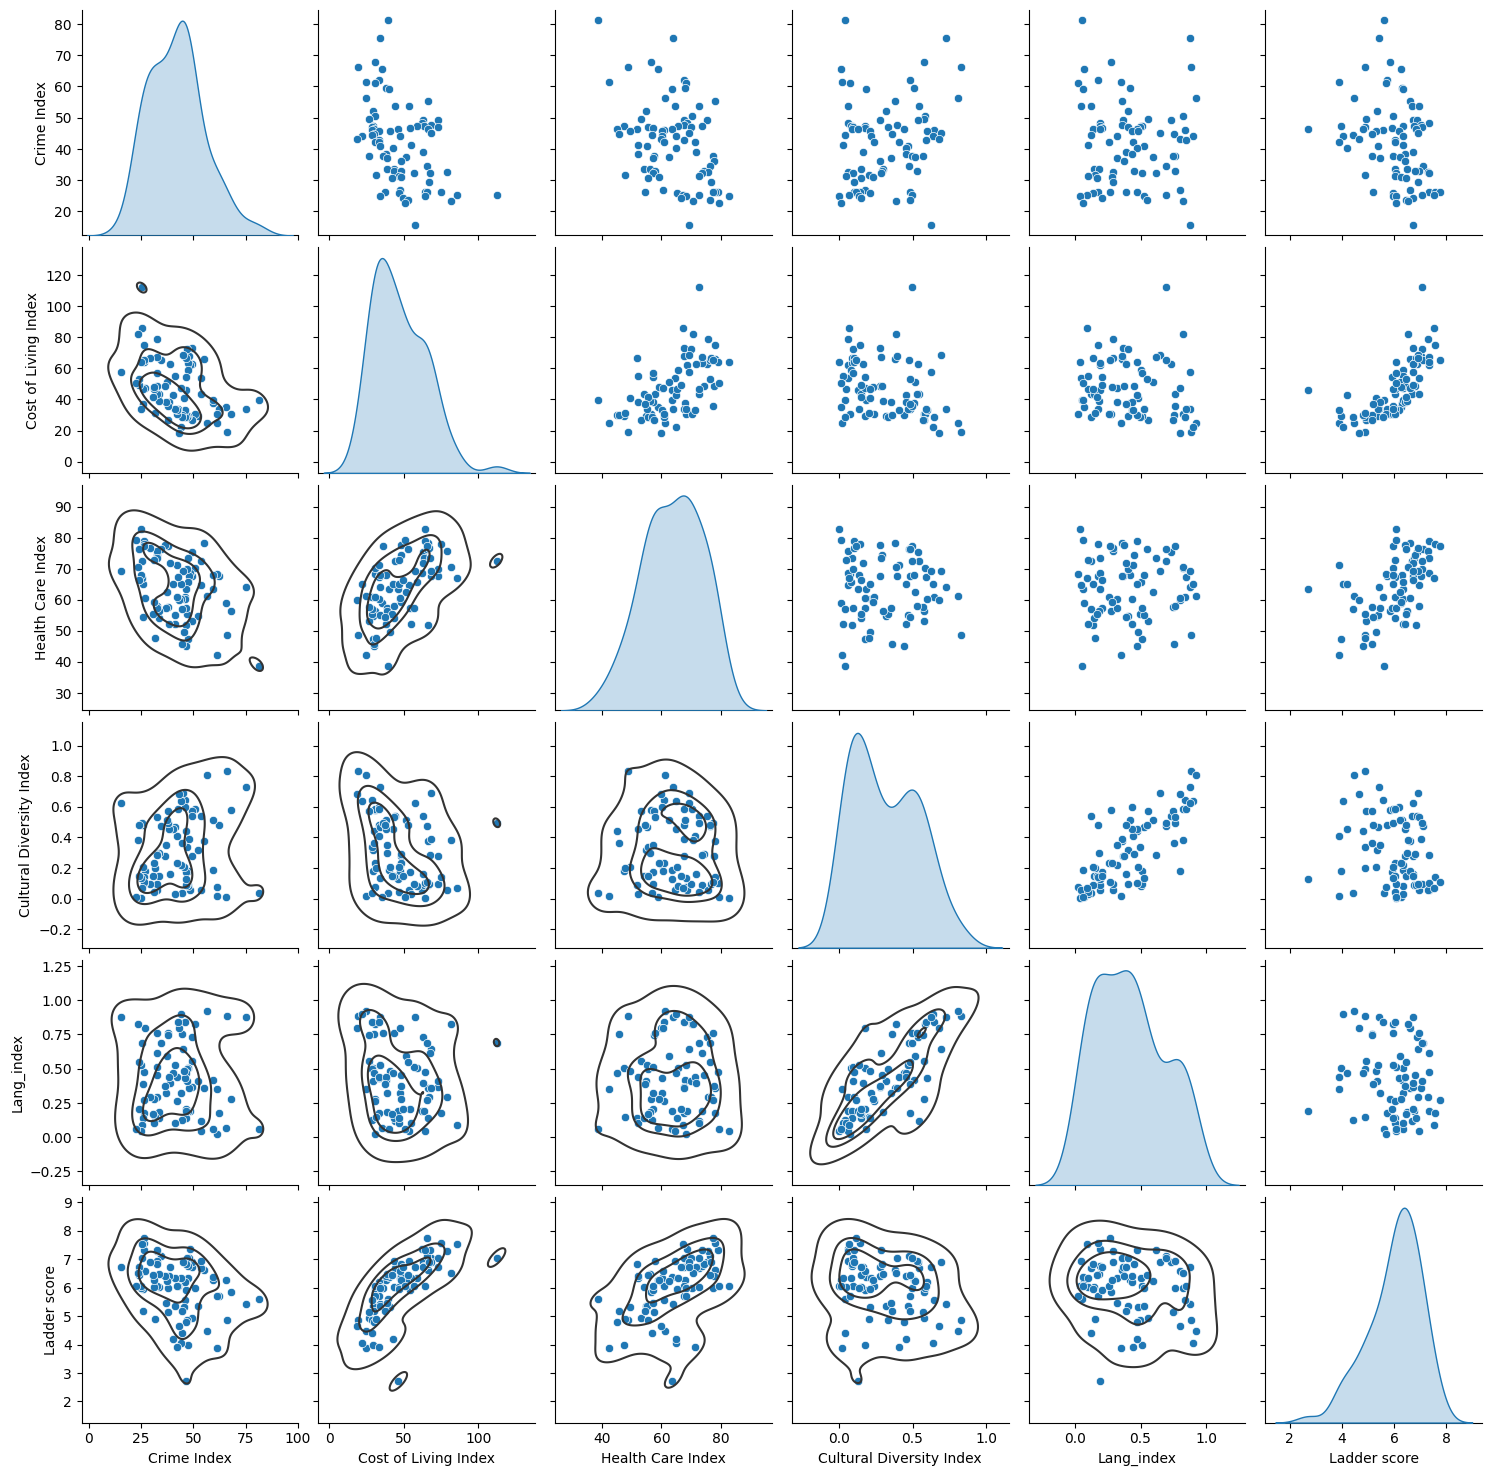

In [21]:
#Построить парные графики для пар признаков
#sns.pairplot(NoCountrySet)
g = sns.pairplot(NoCountrySet, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [ ]:
#Выявить нелинейные зависимости между переменными
#Исходя из парных диаргамм, не вижу явных не линейных зависимостей, кроме Cost of living Index и Ladder Score, возможно там есть слабая экспоненциальная зависисмость

In [ ]:
#Вывод
#Из рассчитанных доверительных интервалов, можно сказать, что с вероятностью 95% все значения не превышают максимальную границу - 65.92041386956257 (Health Care Index)
#Выборка не содержит ошибок и пустых значений
#Из анализа распределений, можно сказать, что все факторы с сайта numbeo имеют нормальное распределение
#Корреляционный анализ выявил корреляцию между определенными факторами, не линейных зависимостей не обнаружено, кроме Cost of living Index и Ladder Score, возможно там есть слабая экспоненциальная зависисмость

In [ ]:
#Иерархический кластерный анализ данных

In [ ]:
#Выбрать тип расстояний и метод построения иерархии
#Буду использовать AgglomerativeClustering с дефолтным евклидовым расстоянием

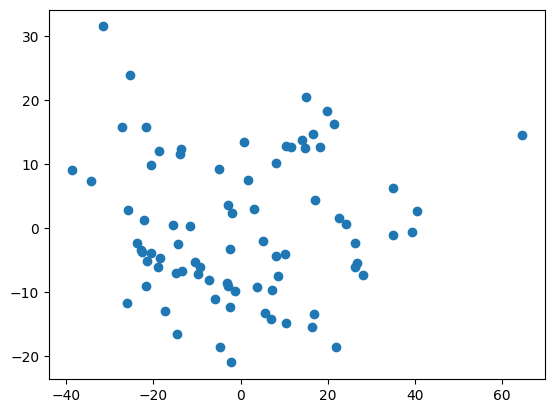

In [22]:
#Для удобства визуализации ко всем аттрибутам применю метод главных компонет
#Применение метода главных компонент
pca = PCA(n_components=2)
pca = pca.fit(NoCountrySet)

X_pca = pca.transform(NoCountrySet)

plt.scatter(X_pca[:, 0], X_pca[:, 1])

In [23]:
#Функция построения дендограммы
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

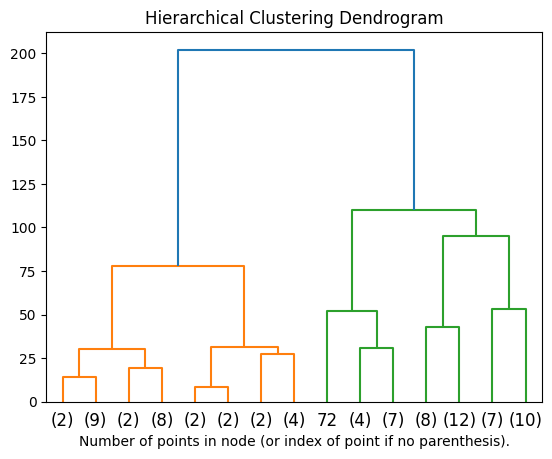

In [24]:
#Проанализировать различные иерархии
#Применю метод агломеративной кластеризации и построю дендограму для анализа иерархий

#AgglomerativeClustering
AG_ = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='euclidean')
AG_ = AG_.fit(X_pca)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(AG_, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [25]:
#Найдем 72 элемент наших данных
print(X_pca[72:73])
#Посмотрим на диаграмму рассеивания, этот элемент лежит в стороне от других, поэтому в кластер он попал последним
#Интересно, какая страна находится под номером 72
IconDataSet[72:73]
#Это Швейцария, действительно уникальная страна, которая отличается от других стран

[[64.71537759 14.57376844]]


,Country,Crime Index,Cost of Living Index,Health Care Index,Cultural Diversity Index,Lang_index,Ladder score
72,Switzerland,25.3,112.2,72.6,0.496,0.691,7.0602


In [26]:
#Сопоставить сходство/различия в получаемых иерархиях для больших и малых порогах объединения
#Возьмем несколько порогов объединения (2, 5, 7, 12)

#Кластеризация на 2 кластера
AG_2 = AgglomerativeClustering(n_clusters=2, metric='euclidean')
AG_2 = AG_2.fit(X_pca)

#Кластеризация на 5 кластеров
AG_5 = AgglomerativeClustering(n_clusters=5, metric='euclidean')
AG_5 = AG_5.fit(X_pca)

#Кластеризация на 7 кластеров
AG_7 = AgglomerativeClustering(n_clusters=7, metric='euclidean')
AG_7 = AG_7.fit(X_pca)

#Кластеризация на 12 кластеров
AG_12 = AgglomerativeClustering(n_clusters=12, metric='euclidean')
AG_12 = AG_12.fit(X_pca)

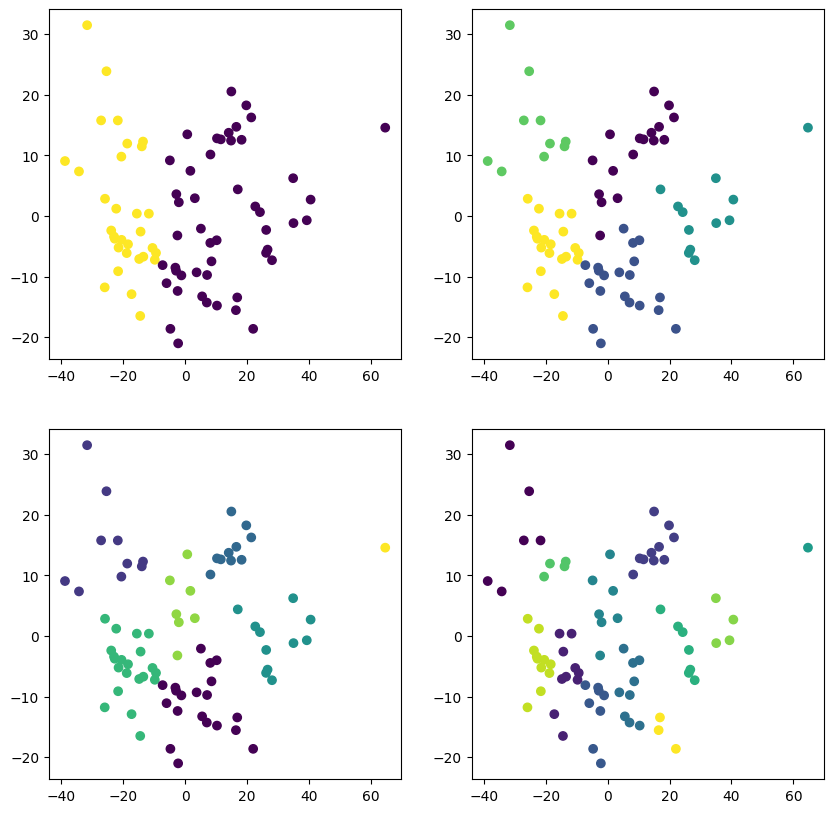

In [27]:
fig, ax = plt.subplots(2,2, figsize = (10,10))

ax[0,0].scatter(X_pca[:, 0], X_pca[:, 1], c = AG_2.labels_, cmap='viridis')
#ax[0,0].add_artist(plt.Circle((64.71537759, 14.57376844), 5, color='r', fill=False))
#ax[0,0].add_artist(Ellipse((64.71537759, 14.57376844), 6, 3, color='r', fill=False))
ax[0,1].scatter(X_pca[:, 0], X_pca[:, 1], c = AG_5.labels_, cmap='viridis')
ax[1,0].scatter(X_pca[:, 0], X_pca[:, 1], c = AG_7.labels_, cmap='viridis')
ax[1,1].scatter(X_pca[:, 0], X_pca[:, 1], c = AG_12.labels_, cmap='viridis')


In [28]:
#Сопоставим представителей каждого кластера в каждой иерархии
pca_frame = pd.DataFrame(X_pca)

pca_frame['AG_2_labels'] = AG_2.labels_
pca_frame['AG_5_labels'] = AG_5.labels_
pca_frame['AG_7_labels'] = AG_7.labels_
pca_frame['AG_12_labels'] = AG_12.labels_

pca_frame['Countries'] = IconDataSet['Country']
pca_frame

,0,1,AG_2_labels,AG_5_labels,AG_7_labels,AG_12_labels,Countries
0,-31.636689,31.484953,1,3,1,0,Venezuela
1,-25.388308,23.885450,1,3,1,0,South Africa
2,-27.117131,15.771951,1,3,1,0,Peru
3,-38.790897,9.064949,1,3,1,0,Nigeria
4,-21.714094,15.765301,1,3,1,0,Brazil
...,...,...,...,...,...,...,...
75,10.330231,-14.789114,0,1,0,4,Slovenia
76,16.882004,-13.442844,0,1,0,11,Estonia
77,39.358976,-0.707874,0,2,3,9,Singapore
78,16.457835,-15.541834,0,1,0,11,Japan


In [29]:
#Отбор точек для анализа
#pca_frame[(pca_frame[0] > 0) & (pca_frame[1] > -13) & (pca_frame[0] < 10) & (pca_frame[1] < -8)]
pca_frame[(pca_frame['AG_12_labels'] == 11)]

,0,1,AG_2_labels,AG_5_labels,AG_7_labels,AG_12_labels,Countries
76,16.882004,-13.442844,0,1,0,11,Estonia
78,16.457835,-15.541834,0,1,0,11,Japan
79,22.032989,-18.624625,0,1,0,11,United Arab Emirates


In [30]:
#Оценить оптимальное количество кластеров и их структуру
#Для оценки оптимального количества кластеров использую метрику качества кластеризации - метод силуетов. Разбиение, с наибольшим значением буду считать лучшим
print("Значения метрики силуетов, для иерархии из 2 кластеров " + str(silhouette_score(X_pca, AG_2.labels_)))
print("Значения метрики силуетов, для иерархии из 5 кластеров " + str(silhouette_score(X_pca, AG_5.labels_)))
print("Значения метрики силуетов, для иерархии из 7 кластеров " + str(silhouette_score(X_pca, AG_7.labels_)))
print("Значения метрики силуетов, для иерархии из 12 кластеров " + str(silhouette_score(X_pca, AG_12.labels_)))
#Лучшее значение метода силуетов получилось для иерархии из 7 кластеров, будем считать такое количество оптимальным

Значения метрики силуетов, для иерархии из 2 кластеров 0.4085144235255031
Значения метрики силуетов, для иерархии из 5 кластеров 0.4172316278712211
Значения метрики силуетов, для иерархии из 7 кластеров 0.42338463369260476
Значения метрики силуетов, для иерархии из 12 кластеров 0.4164419161683187


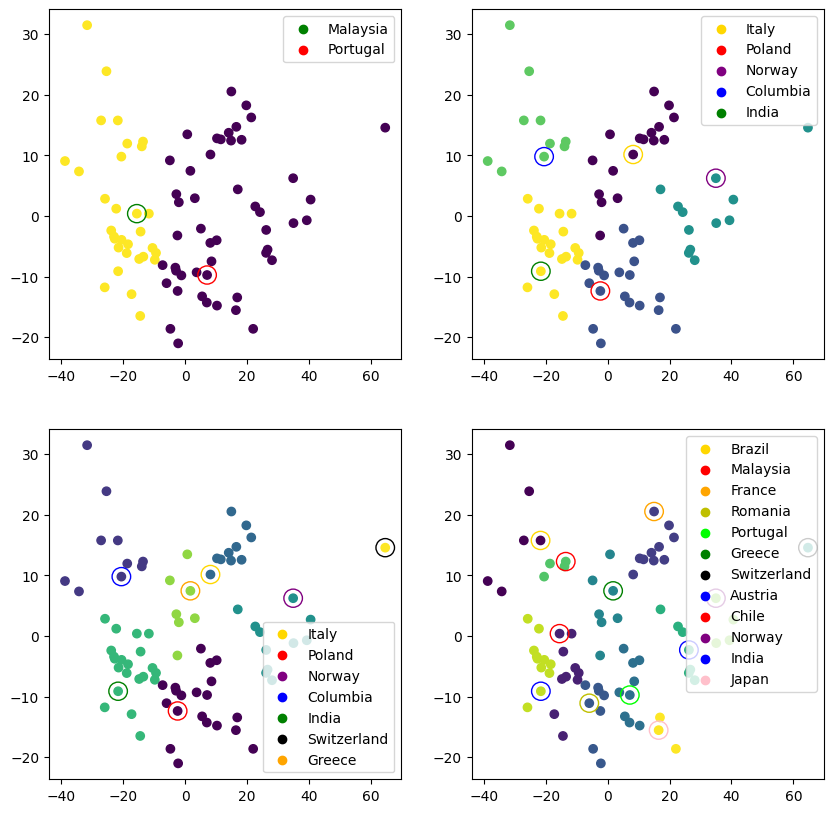

In [31]:
#Проведем анализ структуры кластеров
#Я выбрал представителей каждого кластера и отметил их точками
fig, ax = plt.subplots(2,2, figsize = (10,10))

ax[0,0].scatter(X_pca[:, 0], X_pca[:, 1], c = AG_2.labels_, cmap='viridis')
#ax[0,0].add_artist(plt.Circle((64.71537759, 14.57376844), 5, color='r', fill=False))
ax[0,0].add_artist(Ellipse((-15.565664, 0.388383), 6, 3, color='g', fill=False))
ax[0,0].add_artist(Ellipse((7.135954, -9.743181), 6, 3, color='r', fill=False))
ax[0,0].scatter([], [], c='g', label='Malaysia')
ax[0,0].scatter([], [], c='r', label='Portugal')
ax[0,0].legend()

ax[0,1].scatter(X_pca[:, 0], X_pca[:, 1], c = AG_5.labels_, cmap='viridis')
ax[0,1].add_artist(Ellipse((8.227129, 10.143130), 6, 3, color='gold', fill=False))
ax[0,1].add_artist(Ellipse((-2.385664, -12.375296), 6, 3, color='r', fill=False))
ax[0,1].add_artist(Ellipse((34.954617,	6.232946), 6, 3, color='purple', fill=False))
ax[0,1].add_artist(Ellipse((-20.567284, 9.795822), 6, 3, color='b', fill=False))
ax[0,1].add_artist(Ellipse((-21.617485, -9.117589), 6, 3, color='g', fill=False))
ax[0,1].scatter([], [], c='gold', label='Italy')
ax[0,1].scatter([], [], c='r', label='Poland')
ax[0,1].scatter([], [], c='purple', label='Norway')
ax[0,1].scatter([], [], c='b', label='Columbia')
ax[0,1].scatter([], [], c='g', label='India')
ax[0,1].legend()

ax[1,0].scatter(X_pca[:, 0], X_pca[:, 1], c = AG_7.labels_, cmap='viridis')
ax[1,0].add_artist(Ellipse((8.227129, 10.143130), 6, 3, color='gold', fill=False))
ax[1,0].add_artist(Ellipse((-2.385664, -12.375296), 6, 3, color='r', fill=False))
ax[1,0].add_artist(Ellipse((34.954617,	6.232946), 6, 3, color='purple', fill=False))
ax[1,0].add_artist(Ellipse((-20.567284, 9.795822), 6, 3, color='b', fill=False))
ax[1,0].add_artist(Ellipse((-21.617485, -9.117589), 6, 3, color='g', fill=False))
ax[1,0].add_artist(Ellipse((64.715378, 14.573768), 6, 3, color='black', fill=False))
ax[1,0].add_artist(Ellipse((1.739679, 7.448700), 6, 3, color='orange', fill=False))
ax[1,0].scatter([], [], c='gold', label='Italy')
ax[1,0].scatter([], [], c='r', label='Poland')
ax[1,0].scatter([], [], c='purple', label='Norway')
ax[1,0].scatter([], [], c='b', label='Columbia')
ax[1,0].scatter([], [], c='g', label='India')
ax[1,0].scatter([], [], c='black', label='Switzerland')
ax[1,0].scatter([], [], c='orange', label='Greece')
ax[1,0].legend()

ax[1,1].scatter(X_pca[:, 0], X_pca[:, 1], c = AG_12.labels_, cmap='viridis')
ax[1,1].add_artist(Ellipse((-21.714094, 15.765301), 6, 3, color='gold', fill=False))
ax[1,1].add_artist(Ellipse((-15.565664, 0.388383), 6, 3, color='r', fill=False))
ax[1,1].add_artist(Ellipse((14.980095, 20.541375), 6, 3, color='orange', fill=False))
ax[1,1].add_artist(Ellipse((-5.963162, -11.090691), 6, 3, color='y', fill=False))
ax[1,1].add_artist(Ellipse((7.135954, -9.743181), 6, 3, color='lime', fill=False))
ax[1,1].add_artist(Ellipse((1.739679, 7.448700), 6, 3, color='g', fill=False))
ax[1,1].add_artist(Ellipse((64.715378, 14.573768), 6, 3, color='black', fill=False))
ax[1,1].add_artist(Ellipse((26.240208, -2.304074), 6, 3, color='b', fill=False))
ax[1,1].add_artist(Ellipse((-13.571938, 12.281563), 6, 3, color='r', fill=False))
ax[1,1].add_artist(Ellipse((34.954617,	6.232946), 6, 3, color='purple', fill=False))
ax[1,1].add_artist(Ellipse((-21.617485, -9.117589), 6, 3, color='b', fill=False))
ax[1,1].add_artist(Ellipse((16.457835, -15.541834), 6, 3, color='pink', fill=False))
ax[1,1].scatter([], [], c='gold', label='Brazil')
ax[1,1].scatter([], [], c='r', label='Malaysia')
ax[1,1].scatter([], [], c='orange', label='France')
ax[1,1].scatter([], [], c='y', label='Romania')
ax[1,1].scatter([], [], c='lime', label='Portugal')
ax[1,1].scatter([], [], c='g', label='Greece')
ax[1,1].scatter([], [], c='black', label='Switzerland')
ax[1,1].scatter([], [], c='blue', label='Austria')
ax[1,1].scatter([], [], c='r', label='Chile')
ax[1,1].scatter([], [], c='purple', label='Norway')
ax[1,1].scatter([], [], c='b', label='India')
ax[1,1].scatter([], [], c='pink', label='Japan')
ax[1,1].legend(loc = 'upper right')

In [32]:
#Выведу список представителей и посчитаю разброс значений в каждом кластере, каждого разбиения

cluster_2 = {}
spread_cluster_2 = []
for i in range(2):
  cluster_2['cluster '+str(i)] = pca_frame[(pca_frame['AG_2_labels'] == i)]['Countries'].values
  spread_cluster_2.append(np.mean([(max(pca_frame[(pca_frame['AG_2_labels'] == i)][0]) - min(pca_frame[(pca_frame['AG_2_labels'] == i)][0]))
  ,(max(pca_frame[(pca_frame['AG_2_labels'] == i)][1]) - min(pca_frame[(pca_frame['AG_2_labels'] == i)][1]))]))

print("Основные представители разбиения на 2 кластера ")
print("Средний разброс " + str(np.mean(spread_cluster_2)))
print(cluster_2['cluster 0'])
print(cluster_2['cluster 1'])



cluster_5 = {}
spread_cluster_5 = []
for i in range(5):
  cluster_5['cluster '+str(i)] = pca_frame[(pca_frame['AG_5_labels'] == i)]['Countries'].values
  spread_cluster_5.append(np.mean([(max(pca_frame[(pca_frame['AG_5_labels'] == i)][0]) - min(pca_frame[(pca_frame['AG_5_labels'] == i)][0]))
  ,(max(pca_frame[(pca_frame['AG_5_labels'] == i)][1]) - min(pca_frame[(pca_frame['AG_5_labels'] == i)][1]))]))

print("")
print("Основные представители разбиения на 5 кластеров ")
print("Средний разброс " + str(np.mean(spread_cluster_5)))
print(cluster_5['cluster 0'])
print(cluster_5['cluster 1'])
print(cluster_5['cluster 2'])
print(cluster_5['cluster 3'])
print(cluster_5['cluster 4'])


cluster_7 = {}
spread_cluster_7 = []
for i in range(7):
  cluster_7['cluster '+str(i)] = pca_frame[(pca_frame['AG_7_labels'] == i)]['Countries'].values
  spread_cluster_7.append(np.mean([(max(pca_frame[(pca_frame['AG_7_labels'] == i)][0]) - min(pca_frame[(pca_frame['AG_7_labels'] == i)][0]))
  ,(max(pca_frame[(pca_frame['AG_7_labels'] == i)][1]) - min(pca_frame[(pca_frame['AG_7_labels'] == i)][1]))]))

print("")
print("Основные представители разбиения на 7 кластеров ")
print("Средний разброс " + str(np.mean(spread_cluster_7)))
print(cluster_7['cluster 0'])
print(cluster_7['cluster 1'])
print(cluster_7['cluster 2'])
print(cluster_7['cluster 3'])
print(cluster_7['cluster 4'])
print(cluster_7['cluster 5'])
print(cluster_7['cluster 6'])

cluster_12 = {}
spread_cluster_12 = []
for i in range(12):
  cluster_12['cluster '+str(i)] = pca_frame[(pca_frame['AG_12_labels'] == i)]['Countries'].values
  spread_cluster_12.append(np.mean([(max(pca_frame[(pca_frame['AG_12_labels'] == i)][0]) - min(pca_frame[(pca_frame['AG_12_labels'] == i)][0]))
  ,(max(pca_frame[(pca_frame['AG_12_labels'] == i)][1]) - min(pca_frame[(pca_frame['AG_12_labels'] == i)][1]))]))

print("")
print("Основные представители разбиения на 12 кластеров ")
print("Средний разброс " + str(np.mean(spread_cluster_12)))
print(cluster_12['cluster 0'])
print(cluster_12['cluster 1'])
print(cluster_12['cluster 2'])
print(cluster_12['cluster 3'])
print(cluster_12['cluster 4'])
print(cluster_12['cluster 5'])
print(cluster_12['cluster 6'])
print(cluster_12['cluster 7'])
print(cluster_12['cluster 8'])
print(cluster_12['cluster 9'])
print(cluster_12['cluster 10'])
print(cluster_12['cluster 11'])

Основные представители разбиения на 2 кластера 
Средний разброс 47.72808423483603
['France' 'Mexico' 'Costa Rica' 'United States' 'Belgium' 'Sweden'
 'New Zealand' 'United Kingdom' 'Italy' 'Australia' 'Greece' 'Ireland'
 'Lebanon' 'Canada' 'Panama' 'Malta' 'Jordan' 'Germany' 'Thailand'
 'Latvia' 'Bulgaria' 'Spain' 'Luxembourg' 'Hungary' 'Romania' 'Kuwait'
 'Lithuania' 'Norway' 'Cyprus' 'Israel' 'Portugal' 'Slovakia' 'Poland'
 'Austria' 'Saudi Arabia' 'Netherlands' 'Denmark' 'Finland' 'Georgia'
 'Croatia' 'Iceland' 'Switzerland' 'China' 'South Korea' 'Slovenia'
 'Estonia' 'Singapore' 'Japan' 'United Arab Emirates']
['Venezuela' 'South Africa' 'Peru' 'Nigeria' 'Brazil' 'Ecuador'
 'Bangladesh' 'Colombia' 'Guatemala' 'Chile' 'Kenya' 'Algeria' 'Malaysia'
 'Iran' 'Egypt' 'Ukraine' 'Morocco' 'Indonesia' 'Kazakhstan' 'Albania'
 'Iraq' 'Tunisia' 'India' 'Pakistan' 'Philippines' 'Vietnam' 'Sri Lanka'
 'North Macedonia' 'Serbia' 'Nepal' 'Azerbaijan']

Основные представители разбиения на 5 кластер

In [ ]:
#Вывод разброс по кластерам уменьшается с увеличением кластеров

In [ ]:
#Провести кластерный анализ методом К- средних
#Выбрать тип расстояний и метод итеративной кластеризации методом К- средних
#Метод - алгоритм ллойда, тип расстояний евклидовы

In [59]:
#Определить число кластеров и число итераций алгоритма
#Определим оптимальное число кластеров методом локтя

distortions = [] #сюда будем класть среднее квадратов расстояний от центров соответствующих кластеров до каждой точки данных

for k in range(1,10):
  kmeans = KMeans(n_clusters = k, max_iter = 300, algorithm = 'lloyd', init = 'k-means++', n_init=1)
  kmeans = kmeans.fit(X_pca)

  distortions.append(sum(np.min(distance.cdist(X_pca, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / len(X_pca))

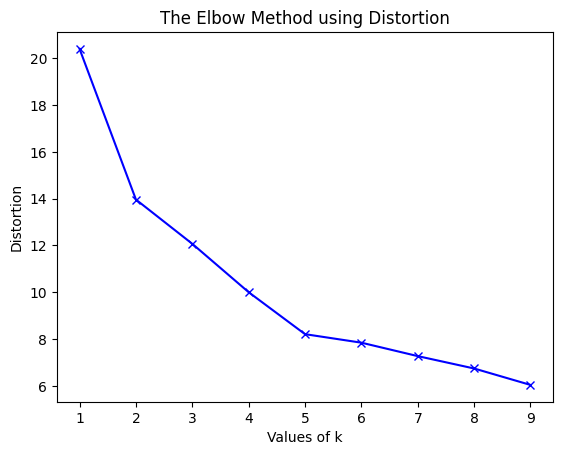

In [60]:
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('Values of k')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
#Из графика буду считать, что оптимально разбить выборку на 5 кластеров, число итераций алгоритма оставлю по умолчанию - 300

In [109]:
#Разбиваем выборку на заданное число кластеров
kmeans = KMeans(n_clusters = 5, max_iter = 300, algorithm = 'lloyd', init = 'k-means++', n_init=1)
kmeans = kmeans.fit(X_pca)

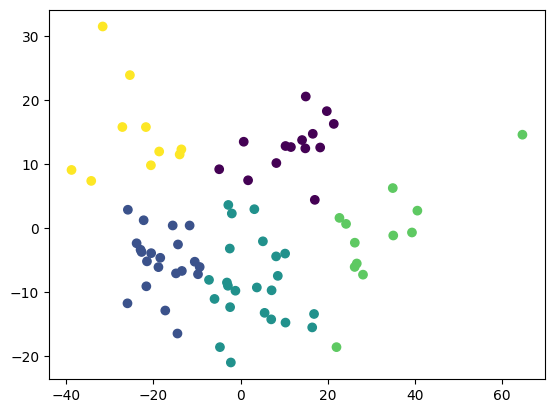

In [112]:
#Визуализация кластерного анализа
fig, ax = plt.subplots()

ax.scatter(X_pca[:, 0], X_pca[:, 1], c = kmeans.labels_, cmap='viridis')


In [ ]:
#Повторить анализ для других расстояний и числа кластеров

In [70]:
#Кластерный анализ c косинусными расстояниями

import nltk
from nltk.cluster.kmeans import KMeansClusterer

kclusterer = KMeansClusterer(5, distance=nltk.cluster.util.cosine_distance, repeats=300)
assigned_clusters = kclusterer.cluster(X_pca, assign_clusters=True)

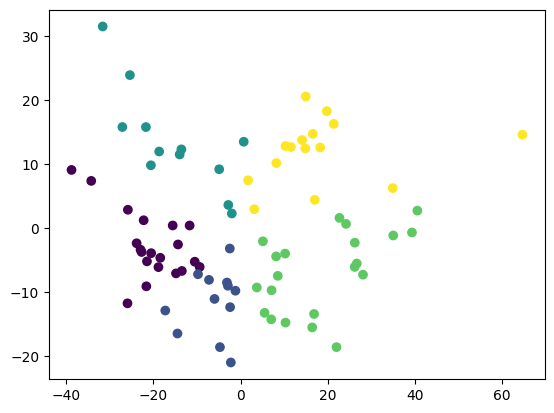

In [72]:
fig, ax = plt.subplots()

ax.scatter(X_pca[:, 0], X_pca[:, 1], c = assigned_clusters, cmap='viridis')

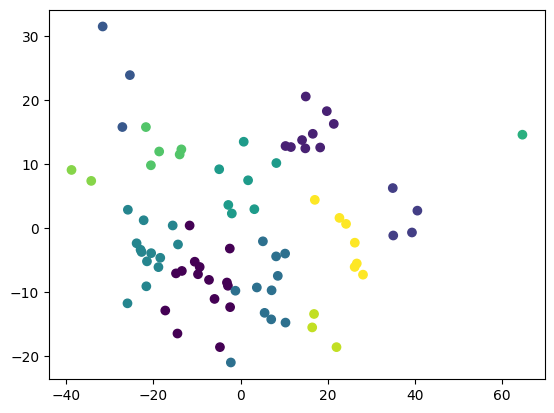

In [113]:
#Кластерный анализ на 12 кластеров по алгоритму elkan
kmeans_ = KMeans(n_clusters = 12, max_iter = 300, algorithm = 'elkan', init = 'k-means++', n_init=1)
kmeans_ = kmeans_.fit(X_pca)

fig, ax = plt.subplots()

ax.scatter(X_pca[:, 0], X_pca[:, 1], c = kmeans_.labels_, cmap='viridis')
#ax.scatter(kmeans_.cluster_centers_[:, 0], kmeans_.cluster_centers_[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10, c = 'r')

In [111]:
#Буду работать с первоначальным разбиением на 5 кластеров
print("Значения метрики силуетов " + str(silhouette_score(X_pca, kmeans.labels_)))

Значения метрики силуетов 0.43054278661206186


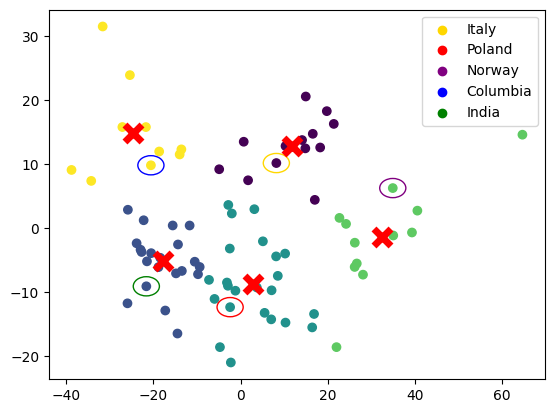

In [115]:
fig, ax = plt.subplots()

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10, c = 'r')
ax.scatter(X_pca[:, 0], X_pca[:, 1], c = kmeans.labels_, cmap='viridis')
ax.add_artist(Ellipse((8.227129, 10.143130), 6, 3, color='gold', fill=False))
ax.add_artist(Ellipse((-2.385664, -12.375296), 6, 3, color='r', fill=False))
ax.add_artist(Ellipse((34.954617,	6.232946), 6, 3, color='purple', fill=False))
ax.add_artist(Ellipse((-20.567284, 9.795822), 6, 3, color='b', fill=False))
ax.add_artist(Ellipse((-21.617485, -9.117589), 6, 3, color='g', fill=False))
ax.scatter([], [], c='gold', label='Italy')
ax.scatter([], [], c='r', label='Poland')
ax.scatter([], [], c='purple', label='Norway')
ax.scatter([], [], c='b', label='Columbia')
ax.scatter([], [], c='g', label='India')
ax.legend()

In [123]:
k_means_frame = pd.DataFrame(X_pca)
k_means_frame['Cluster'] = kmeans.labels_
k_means_frame['Country'] = IconDataSet['Country']
k_means_frame

,0,1,Cluster,Country
0,-31.636689,31.484953,4,Venezuela
1,-25.388308,23.885450,4,South Africa
2,-27.117131,15.771951,4,Peru
3,-38.790897,9.064949,4,Nigeria
4,-21.714094,15.765301,4,Brazil
...,...,...,...,...
75,10.330231,-14.789114,2,Slovenia
76,16.882004,-13.442844,2,Estonia
77,39.358976,-0.707874,3,Singapore
78,16.457835,-15.541834,2,Japan


In [128]:
kmeans_cluster_5 = {}
spread_kmeans_5 = []
for i in range(5):
  kmeans_cluster_5['cluster '+str(i)] = k_means_frame[(k_means_frame['Cluster'] == i)]['Country'].values
  spread_kmeans_5.append(np.mean([(max(k_means_frame[(k_means_frame['Cluster'] == i)][0]) - min(k_means_frame[(k_means_frame['Cluster'] == i)][0]))
  ,(max(k_means_frame[(k_means_frame['Cluster'] == i)][1]) - min(k_means_frame[(k_means_frame['Cluster'] == i)][1]))]))

print("")
print("Основные представители разбиения на 5 кластеров ")
print("Средний разброс " + str(np.mean(spread_kmeans_5)))
print(kmeans_cluster_5['cluster 0'])
print(kmeans_cluster_5['cluster 1'])
print(kmeans_cluster_5['cluster 2'])
print(kmeans_cluster_5['cluster 3'])
print(kmeans_cluster_5['cluster 4'])


Основные представители разбиения на 5 кластеров 
Средний разброс 25.233216951353263
['France' 'Mexico' 'Costa Rica' 'United States' 'Belgium' 'Sweden'
 'New Zealand' 'United Kingdom' 'Italy' 'Australia' 'Greece' 'Ireland'
 'Canada' 'Germany']
['Kenya' 'Algeria' 'Malaysia' 'Iran' 'Egypt' 'Ukraine' 'Morocco'
 'Indonesia' 'Kazakhstan' 'Albania' 'Iraq' 'Tunisia' 'India' 'Pakistan'
 'Philippines' 'Vietnam' 'Sri Lanka' 'North Macedonia' 'Serbia' 'Nepal'
 'Azerbaijan']
['Lebanon' 'Panama' 'Malta' 'Jordan' 'Thailand' 'Latvia' 'Bulgaria'
 'Spain' 'Hungary' 'Romania' 'Kuwait' 'Lithuania' 'Cyprus' 'Portugal'
 'Slovakia' 'Poland' 'Saudi Arabia' 'Georgia' 'Croatia' 'China' 'Slovenia'
 'Estonia' 'Japan']
['Luxembourg' 'Norway' 'Israel' 'Austria' 'Netherlands' 'Denmark'
 'Finland' 'Iceland' 'Switzerland' 'South Korea' 'Singapore'
 'United Arab Emirates']
['Venezuela' 'South Africa' 'Peru' 'Nigeria' 'Brazil' 'Ecuador'
 'Bangladesh' 'Colombia' 'Guatemala' 'Chile']


In [133]:
#Рассчет межклассовой и внутриклассовой дисперсии
print("Межклассовая дисперсия для первого признака " + str(np.var(k_means_frame[0])))
print("Межклассовая дисперсия для второго признака " + str(np.var(k_means_frame[1])))

cluster_variance_0 = []
cluster_variance_1 = []

for i in range(5):
  cluster_variance_0.append(np.var(k_means_frame[(k_means_frame['Cluster'] == i)][0]))
  cluster_variance_1.append(np.var(k_means_frame[(k_means_frame['Cluster'] == i)][1]))

print("внутриклассовой дисперсия для первого признака " + str(cluster_variance_0))
print("внутриклассовой дисперсия для второго признака " + str(cluster_variance_1))
#Наблюдаю большую дисперсию в 4ом кластере по первому признаку, причина в том, что в этот кластер вошли богатые страны - швейцария и норвегия, а также страны среднего развития - финляндия и южная корея

Межклассовая дисперсия для первого признака 403.01912528161523
Межклассовая дисперсия для второго признака 121.22862992980001
внутриклассовой дисперсия для первого признака [56.53431528663233, 26.531895536767085, 46.11797803329864, 130.71138864593235, 64.57730374267751]
внутриклассовой дисперсия для второго признака [16.168374745104256, 21.299283765839284, 41.435412537616536, 59.607329261107026, 50.15789367183952]


<ErrorbarContainer object of 3 artists>

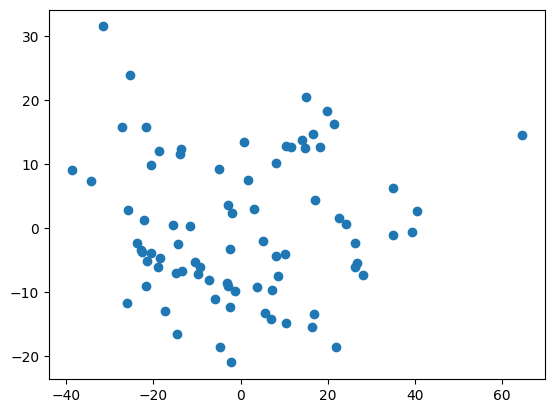

In [134]:
#Построить график центроид полученного кластера (Means Plot)
#Построен в R
#fig, ax = plt.subplots()

#ax.errorbar(X_pca[:, 0], X_pca[:, 1], fmt='o', linewidth=2, capsize=6)

In [138]:
np.mean(k_means_frame[k_means_frame['Cluster'] == 1][0])

-17.88630831637571

In [135]:
k_means_frame.to_csv("k_means_frame.csv", index = False, encoding = 'utf-8')

In [63]:
from nltk.cluster.kmeans import KMeansClusterer
NUM_CLUSTERS = <choose a value>
data = <sparse matrix that you would normally give to scikit>.toarray()

kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(data, assign_clusters=True)

array([[-24.68521835,  13.7891793 ],
       [  3.66436911,  -7.81221312],
       [ 42.93888047,   4.32505068],
       [ 17.9013628 ,   7.94063884],
       [-16.99955993,  -5.75868556]])

In [ ]:

kmeans = KMeans(n_clusters = i, random_state=0, n_init = "auto", algorithm = 'lloyd')
kmeans = kmeans.fit(X_pca_)

In [34]:
len(X_pca)

80

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#